# Code to Perform Logistic Regression

## Problem Statement

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

**Features:**
 - Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
 - Sex:    Sex
 - Age:    Age in years
 - Sibsp:  # of siblings / spouses aboard the Titanic
 - Parch:  # of parents / children aboard the Titanic
 - Ticket: Ticket number
 - Fare:   Passenger fare
 - Cabin:  Cabin number
 - Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
    
 
**Target class**
 - Survived: Survival - (0 = No, 1 = Yes)


## Step #0: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step #1: Import Dataset

In [3]:
training_set = pd.read_csv('Data\Train_Titanic.csv')

In [4]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## Step #2: Explore and Visualize Dataset

In [8]:
survived = training_set[training_set['Survived'] == 1]
no_survived = training_set[training_set['Survived'] == 0]

In [16]:
print('Total = ', len(training_set))
print('Number of passengers who survived = ', len(survived))
print('Number of passengers who did not survive = ', len(no_survived))
print('% Survived = ', round(1. * len(survived) / len(training_set) * 100,2))
print('% Did not survive = ', round(1. * len(no_survived) / len(training_set) * 100,2))

Total =  891
Number of passengers who survived =  342
Number of passengers who did not survive =  549
% Survived =  38.38
% Did not survive =  61.62


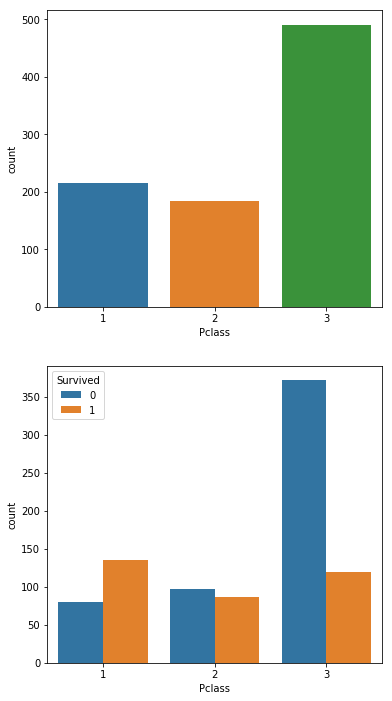

In [25]:
plt.figure(figsize=[6, 12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = training_set);
plt.subplot(212)
sns.countplot(x = 'Pclass', data = training_set, hue='Survived');

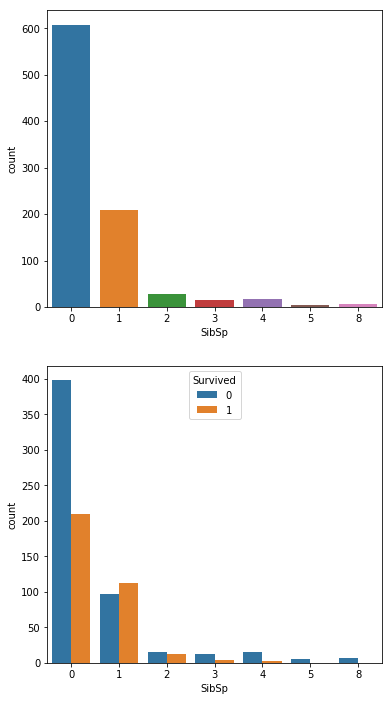

In [27]:
plt.figure(figsize=[6, 12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = training_set);
plt.subplot(212)
sns.countplot(x = 'SibSp', data = training_set, hue='Survived');

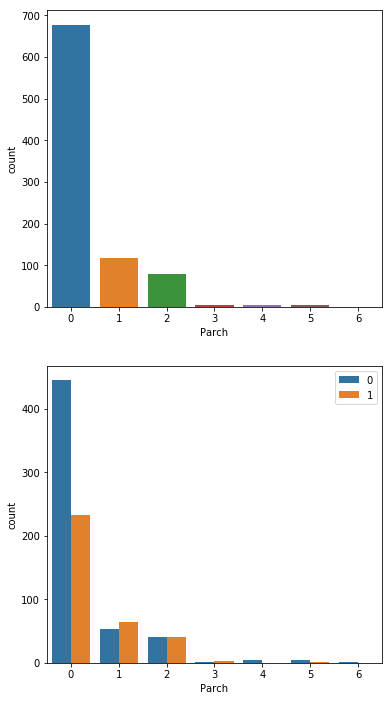

In [31]:
plt.figure(figsize=[6, 12])
plt.subplot(211)
sns.countplot(x = 'Parch', data = training_set);
plt.subplot(212)
sns.countplot(x = 'Parch', data = training_set, hue='Survived');
plt.legend(loc='upper right');

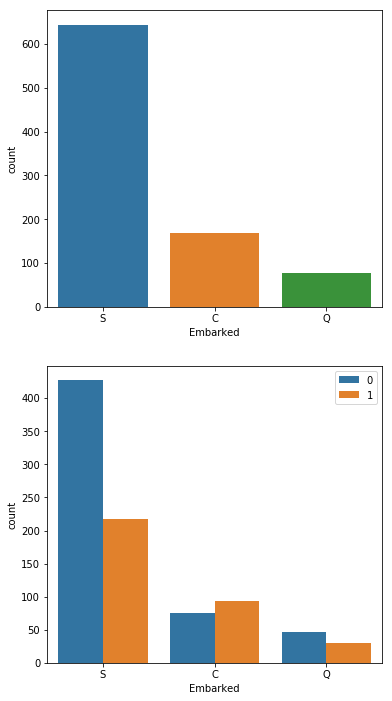

In [32]:
plt.figure(figsize=[6, 12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data = training_set);
plt.subplot(212)
sns.countplot(x = 'Embarked', data = training_set, hue='Survived');
plt.legend(loc='upper right');

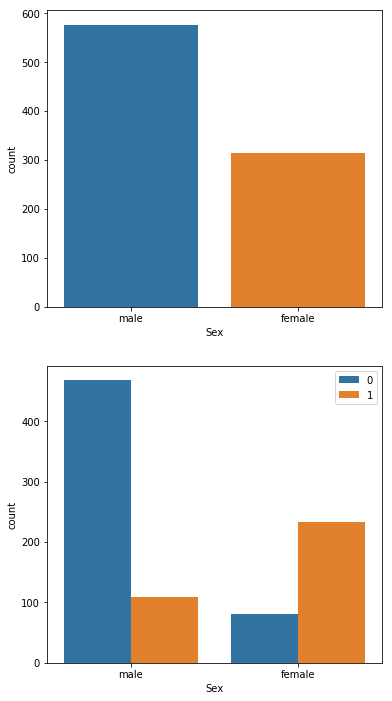

In [33]:
plt.figure(figsize=[6, 12])
plt.subplot(211)
sns.countplot(x = 'Sex', data = training_set);
plt.subplot(212)
sns.countplot(x = 'Sex', data = training_set, hue='Survived');
plt.legend(loc='upper right');

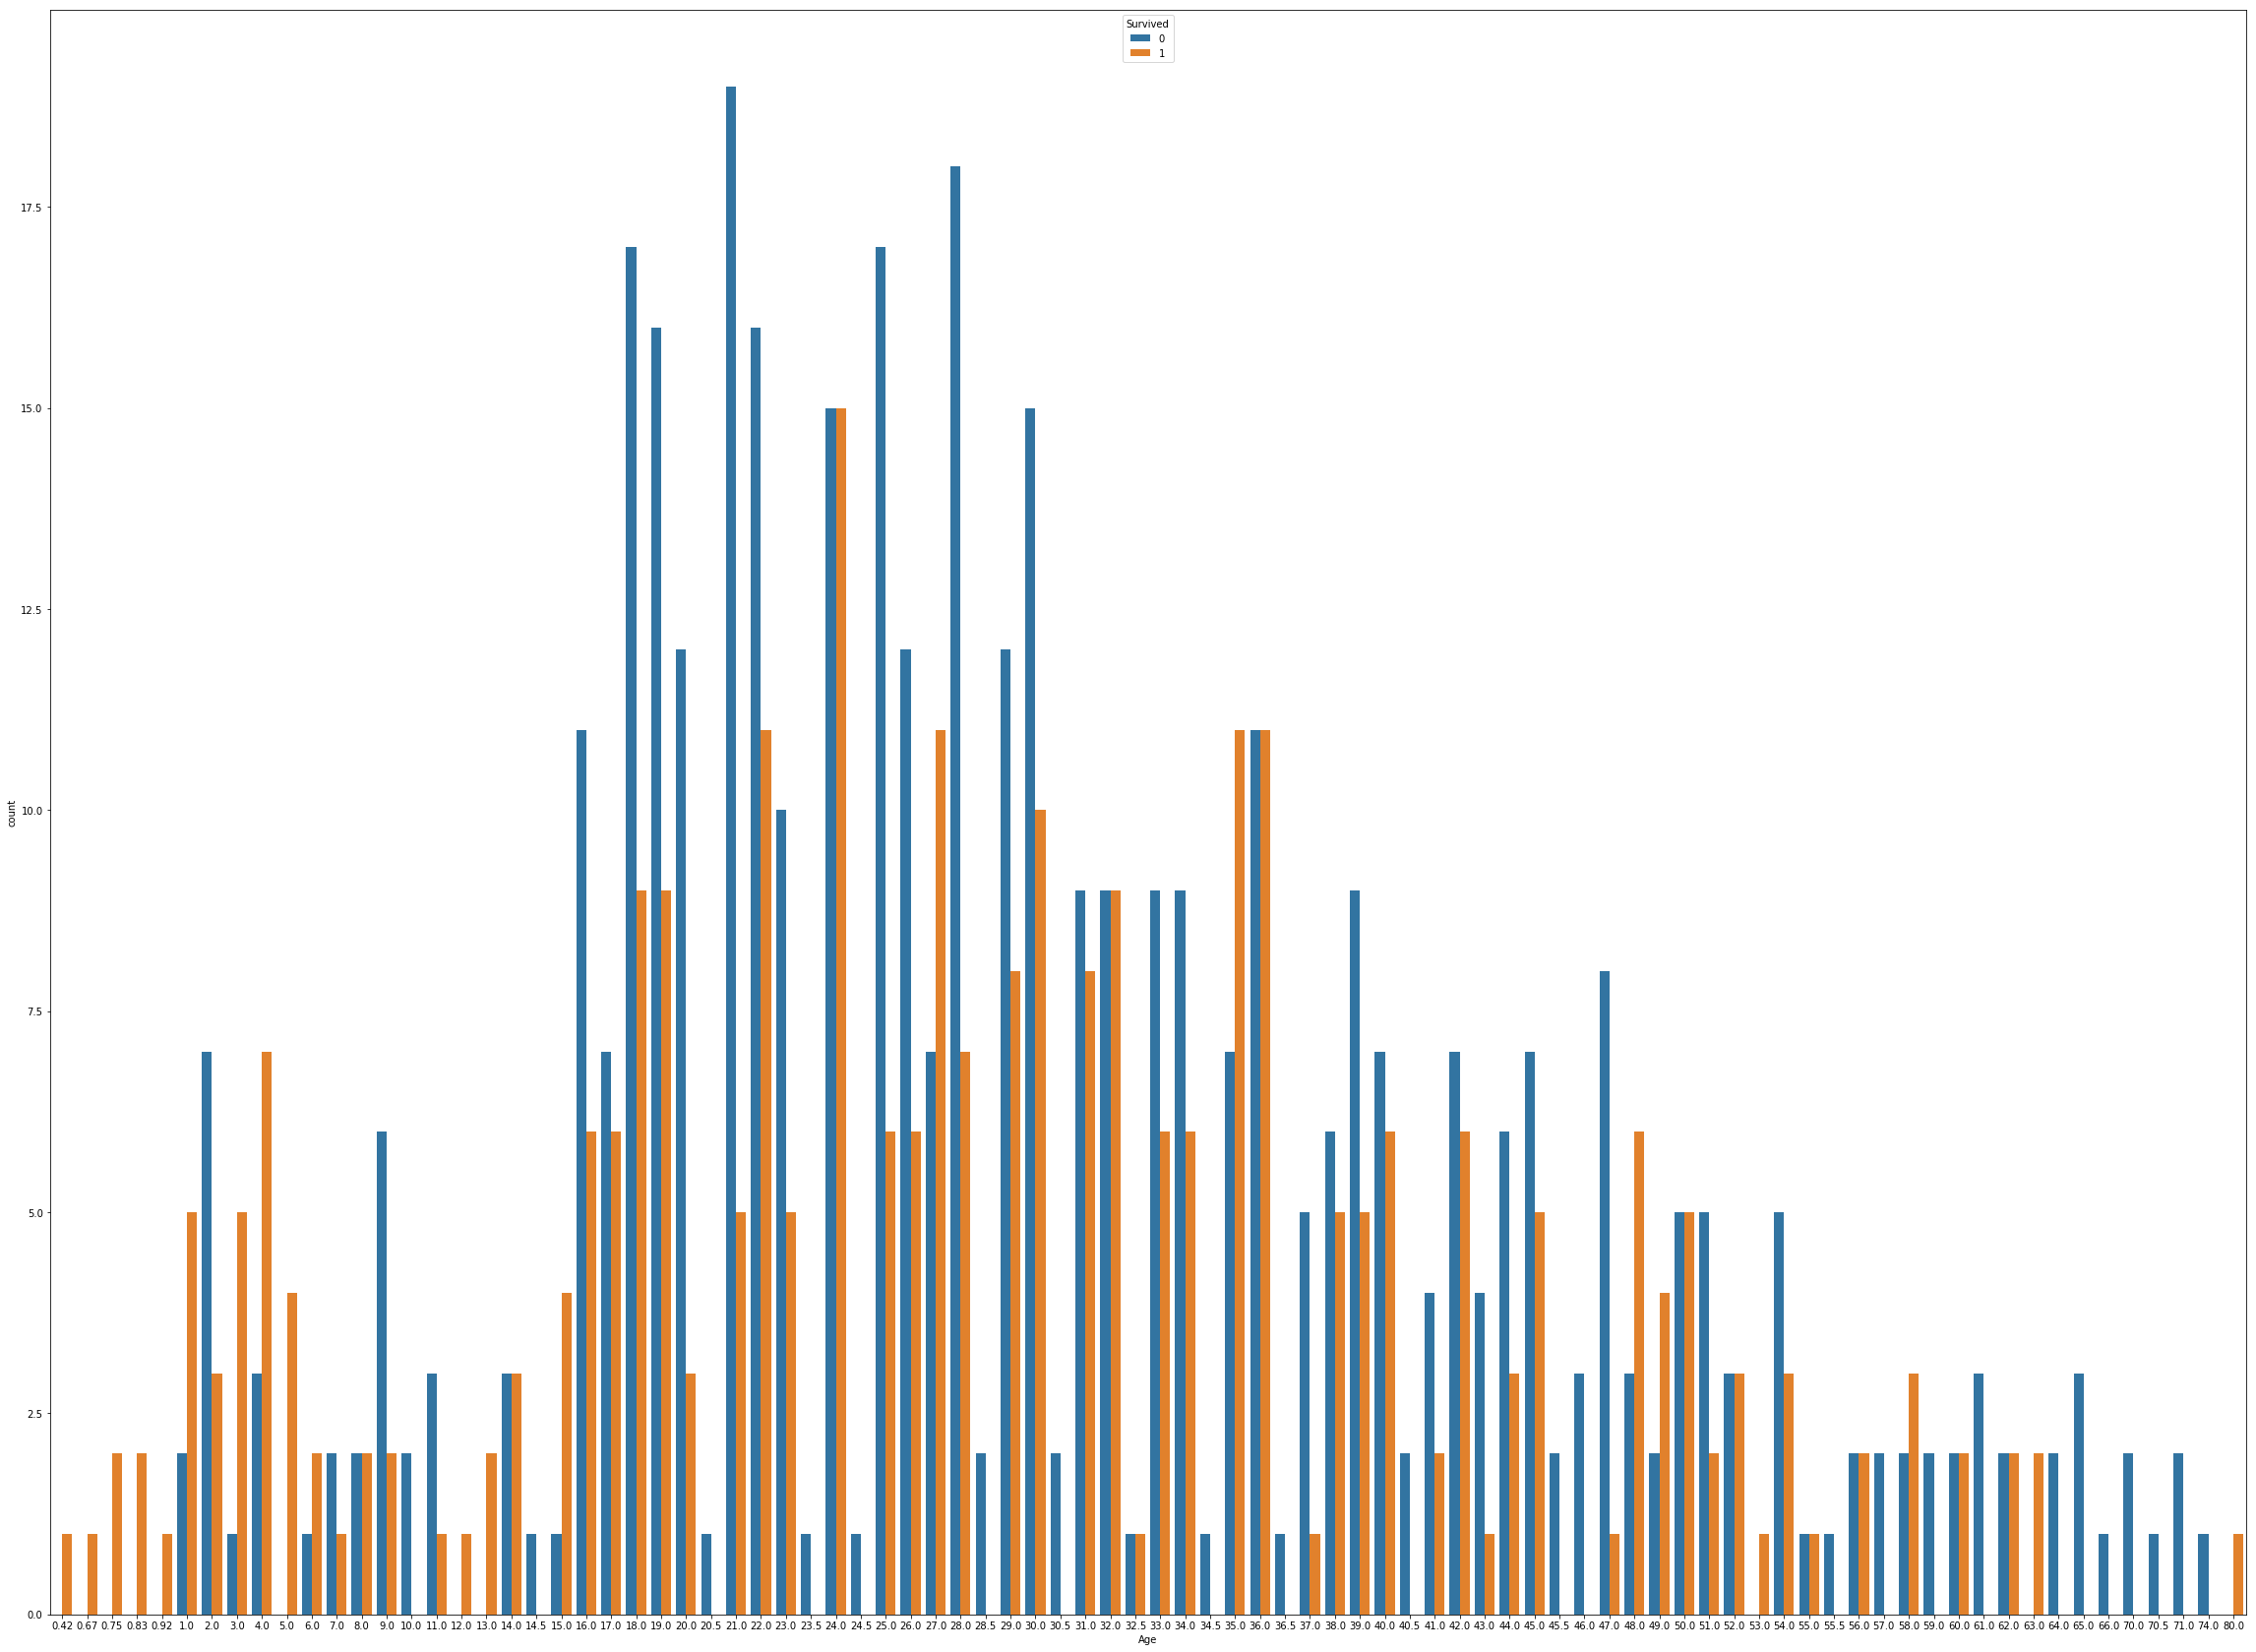

In [36]:
plt.figure(figsize=(40, 30))
sns.countplot(x='Age', hue='Survived', data=training_set);

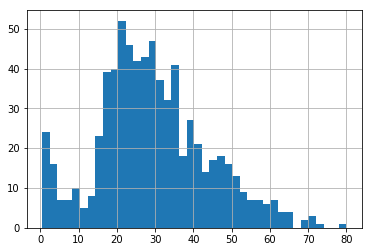

In [37]:
training_set['Age'].hist(bins = 40);

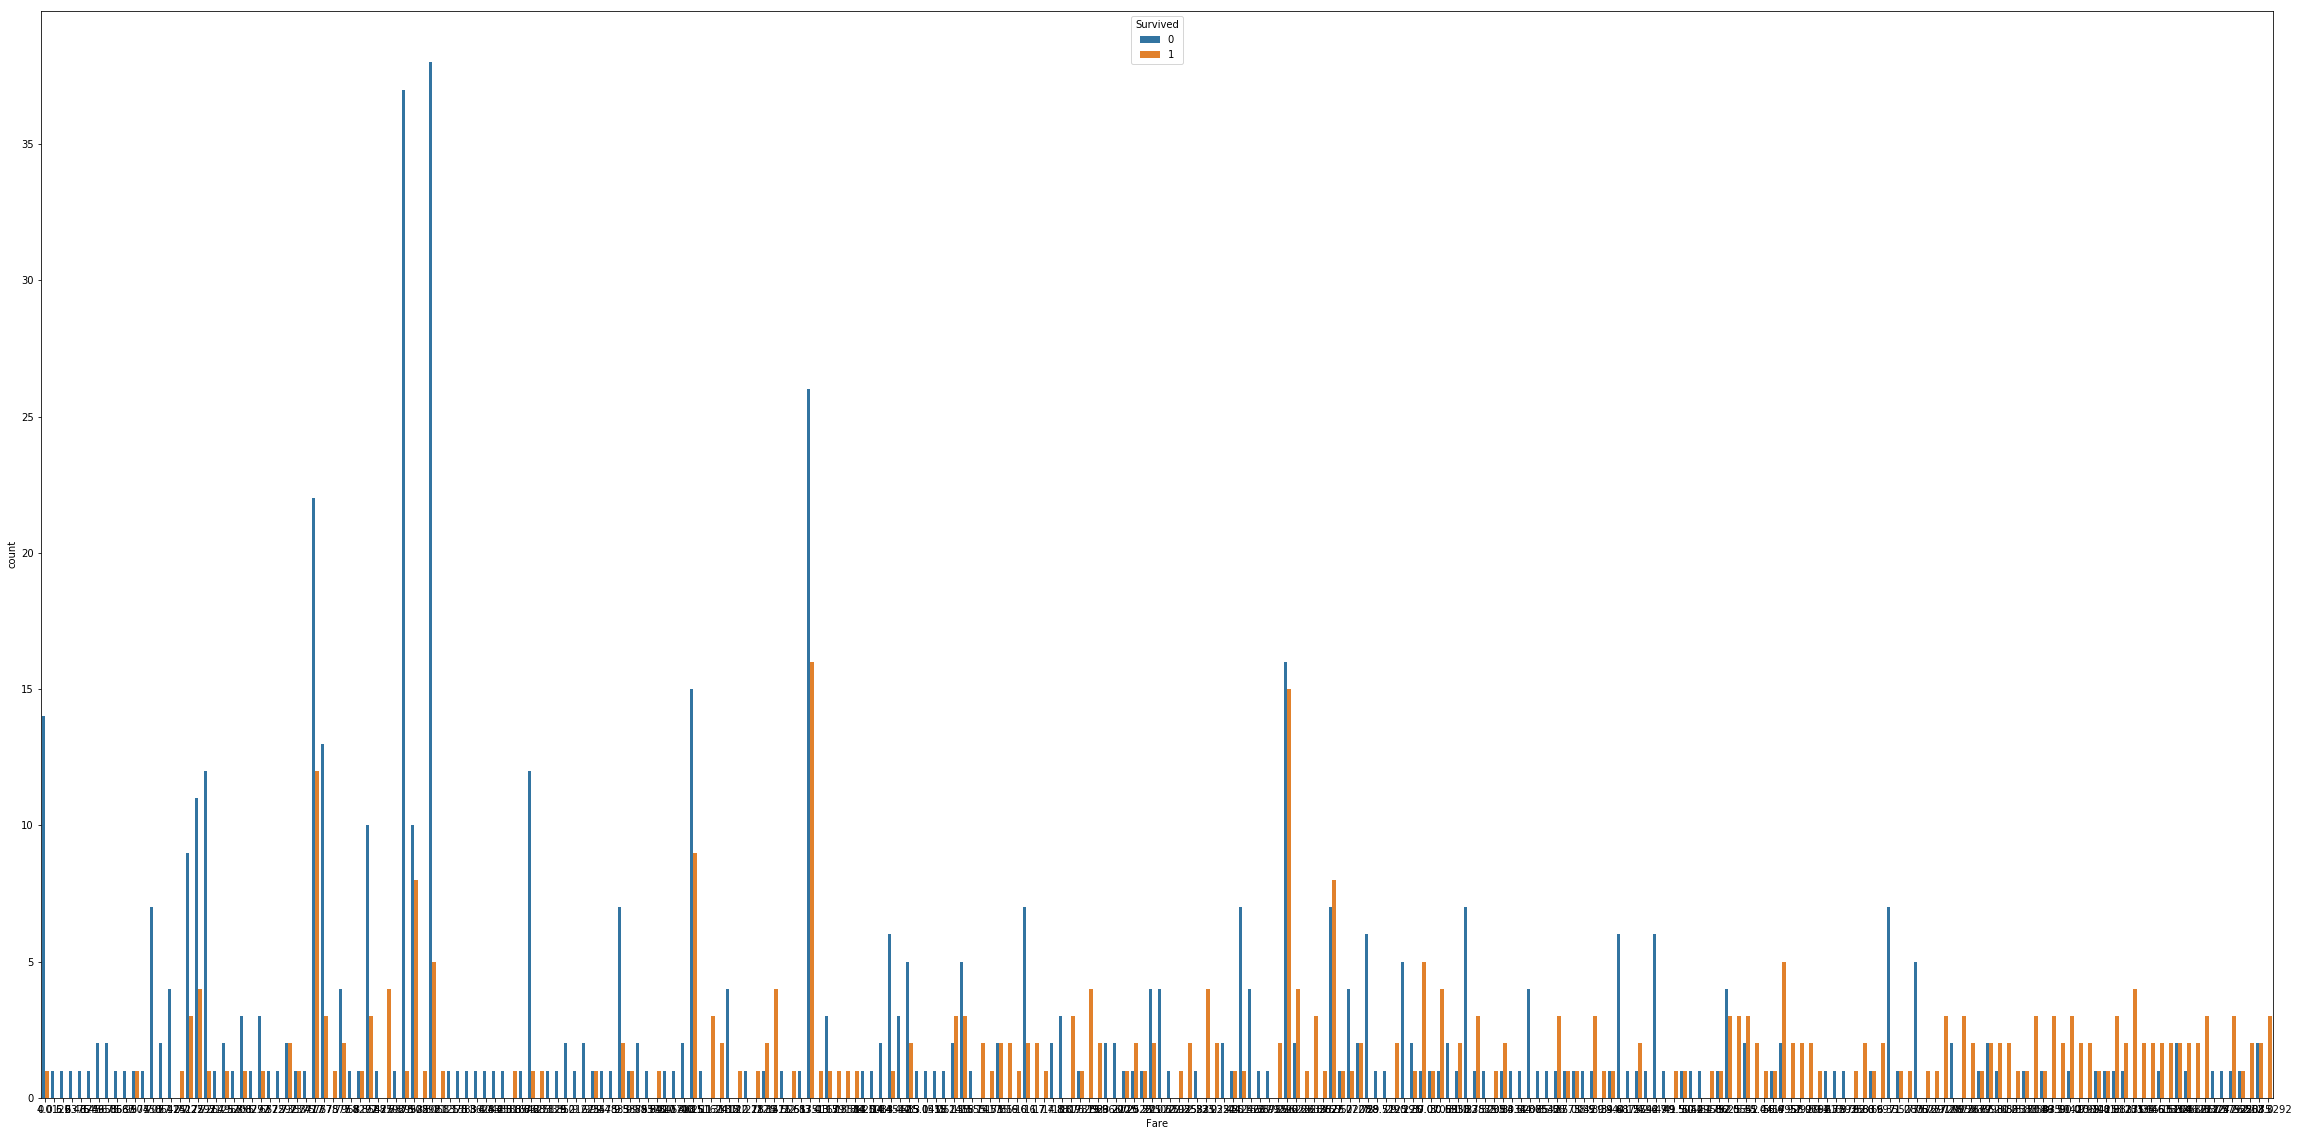

In [39]:
plt.figure(figsize=(40, 20))
sns.countplot(x='Fare', hue='Survived', data=training_set);

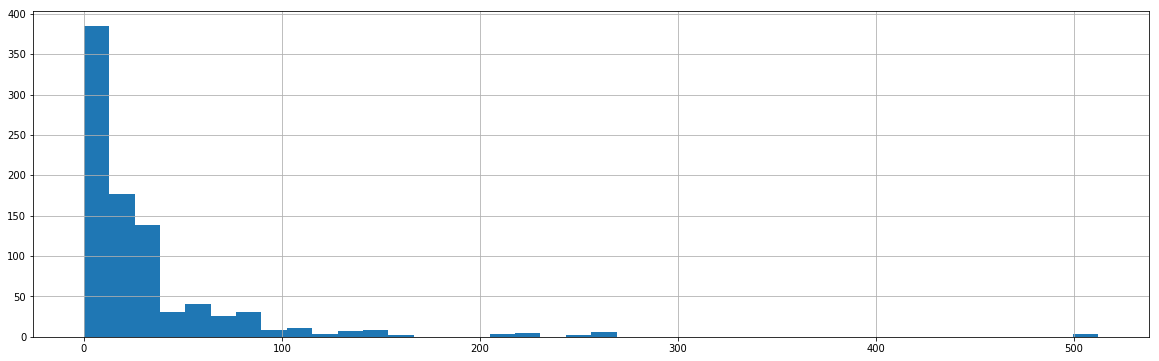

In [46]:
plt.figure(figsize=(20, 6))
training_set['Fare'].hist(bins=40);

## Step #3: Prepare Data for Training / Data Cleaning

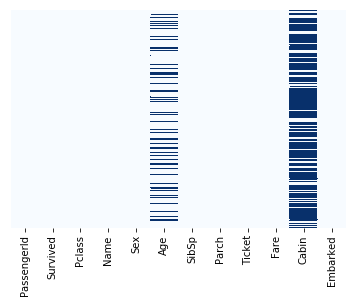

In [50]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues');

In [51]:
training_set.drop('Cabin', axis=1, inplace=True)

In [52]:
training_set.drop(['Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [53]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


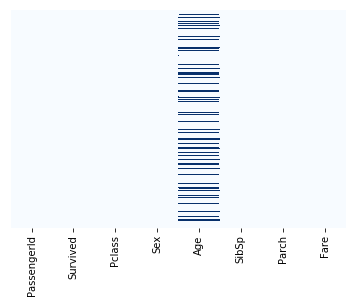

In [54]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues');

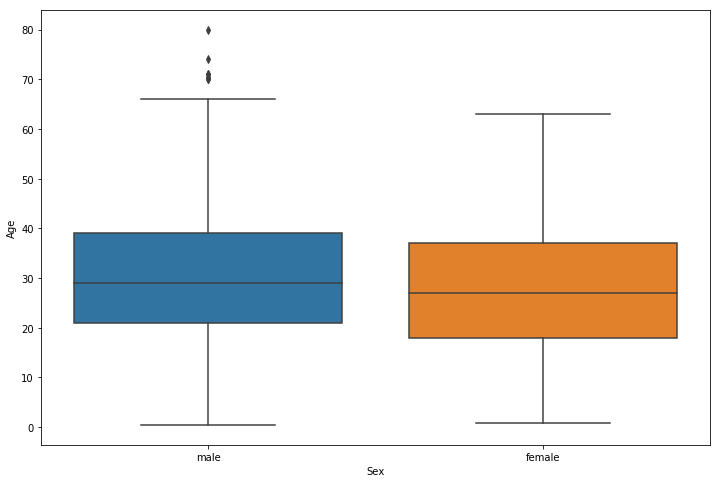

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sex', y='Age', data=training_set);

In [59]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

In [60]:
training_set['Age'] = training_set[['Age', 'Sex']].apply(Fill_Age, axis=1)

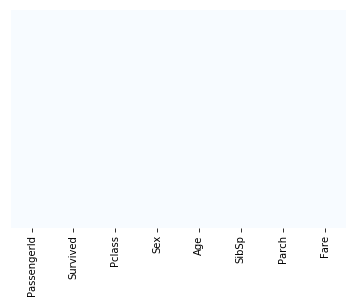

In [61]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues');

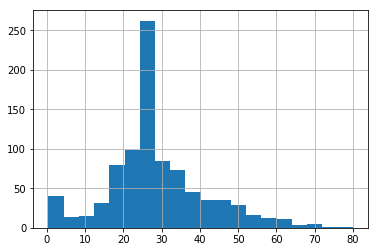

In [63]:
training_set.Age.hist(bins=20);

In [64]:
training_set.drop('PassengerId', axis=1, inplace=True)

In [65]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [66]:
male = pd.get_dummies(training_set['Sex'], drop_first=True)

In [69]:
training_set.drop(['Sex'], axis=1, inplace=True)
training_set = pd.concat([training_set, male], axis=1)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [72]:
X = training_set.drop('Survived', axis=1).values

In [74]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [75]:
y = training_set.Survived.values

In [76]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## Step #4: Model Training

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=10)

In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Step #5: Model Testing

In [92]:
y_predict = classifier.predict(X_test)

In [93]:
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

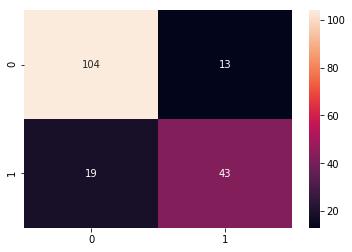

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='d');

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

